In [7]:
# base conclusion from current testing is that Vision library is more accurate than kraken model. But it is also more complex to work around with

import kraken
from kraken import pageseg
from PIL import Image

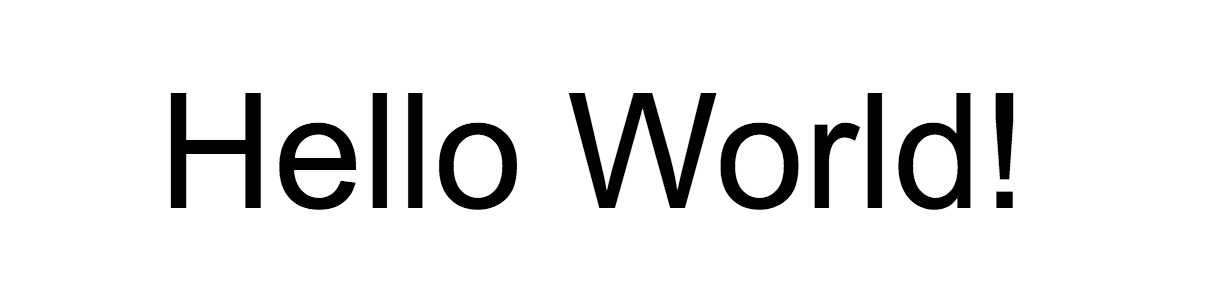

In [3]:
img = Image.open('Sample.png')
img

In [4]:
bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
print(bounding_boxes)

[[170, 93, 1013, 210]]


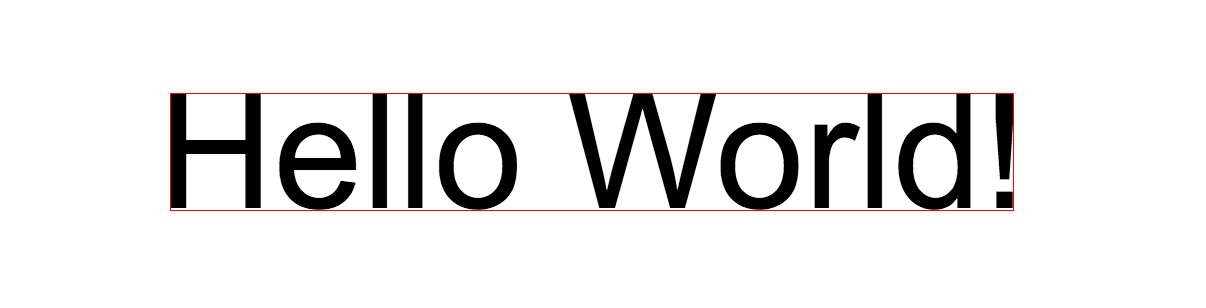

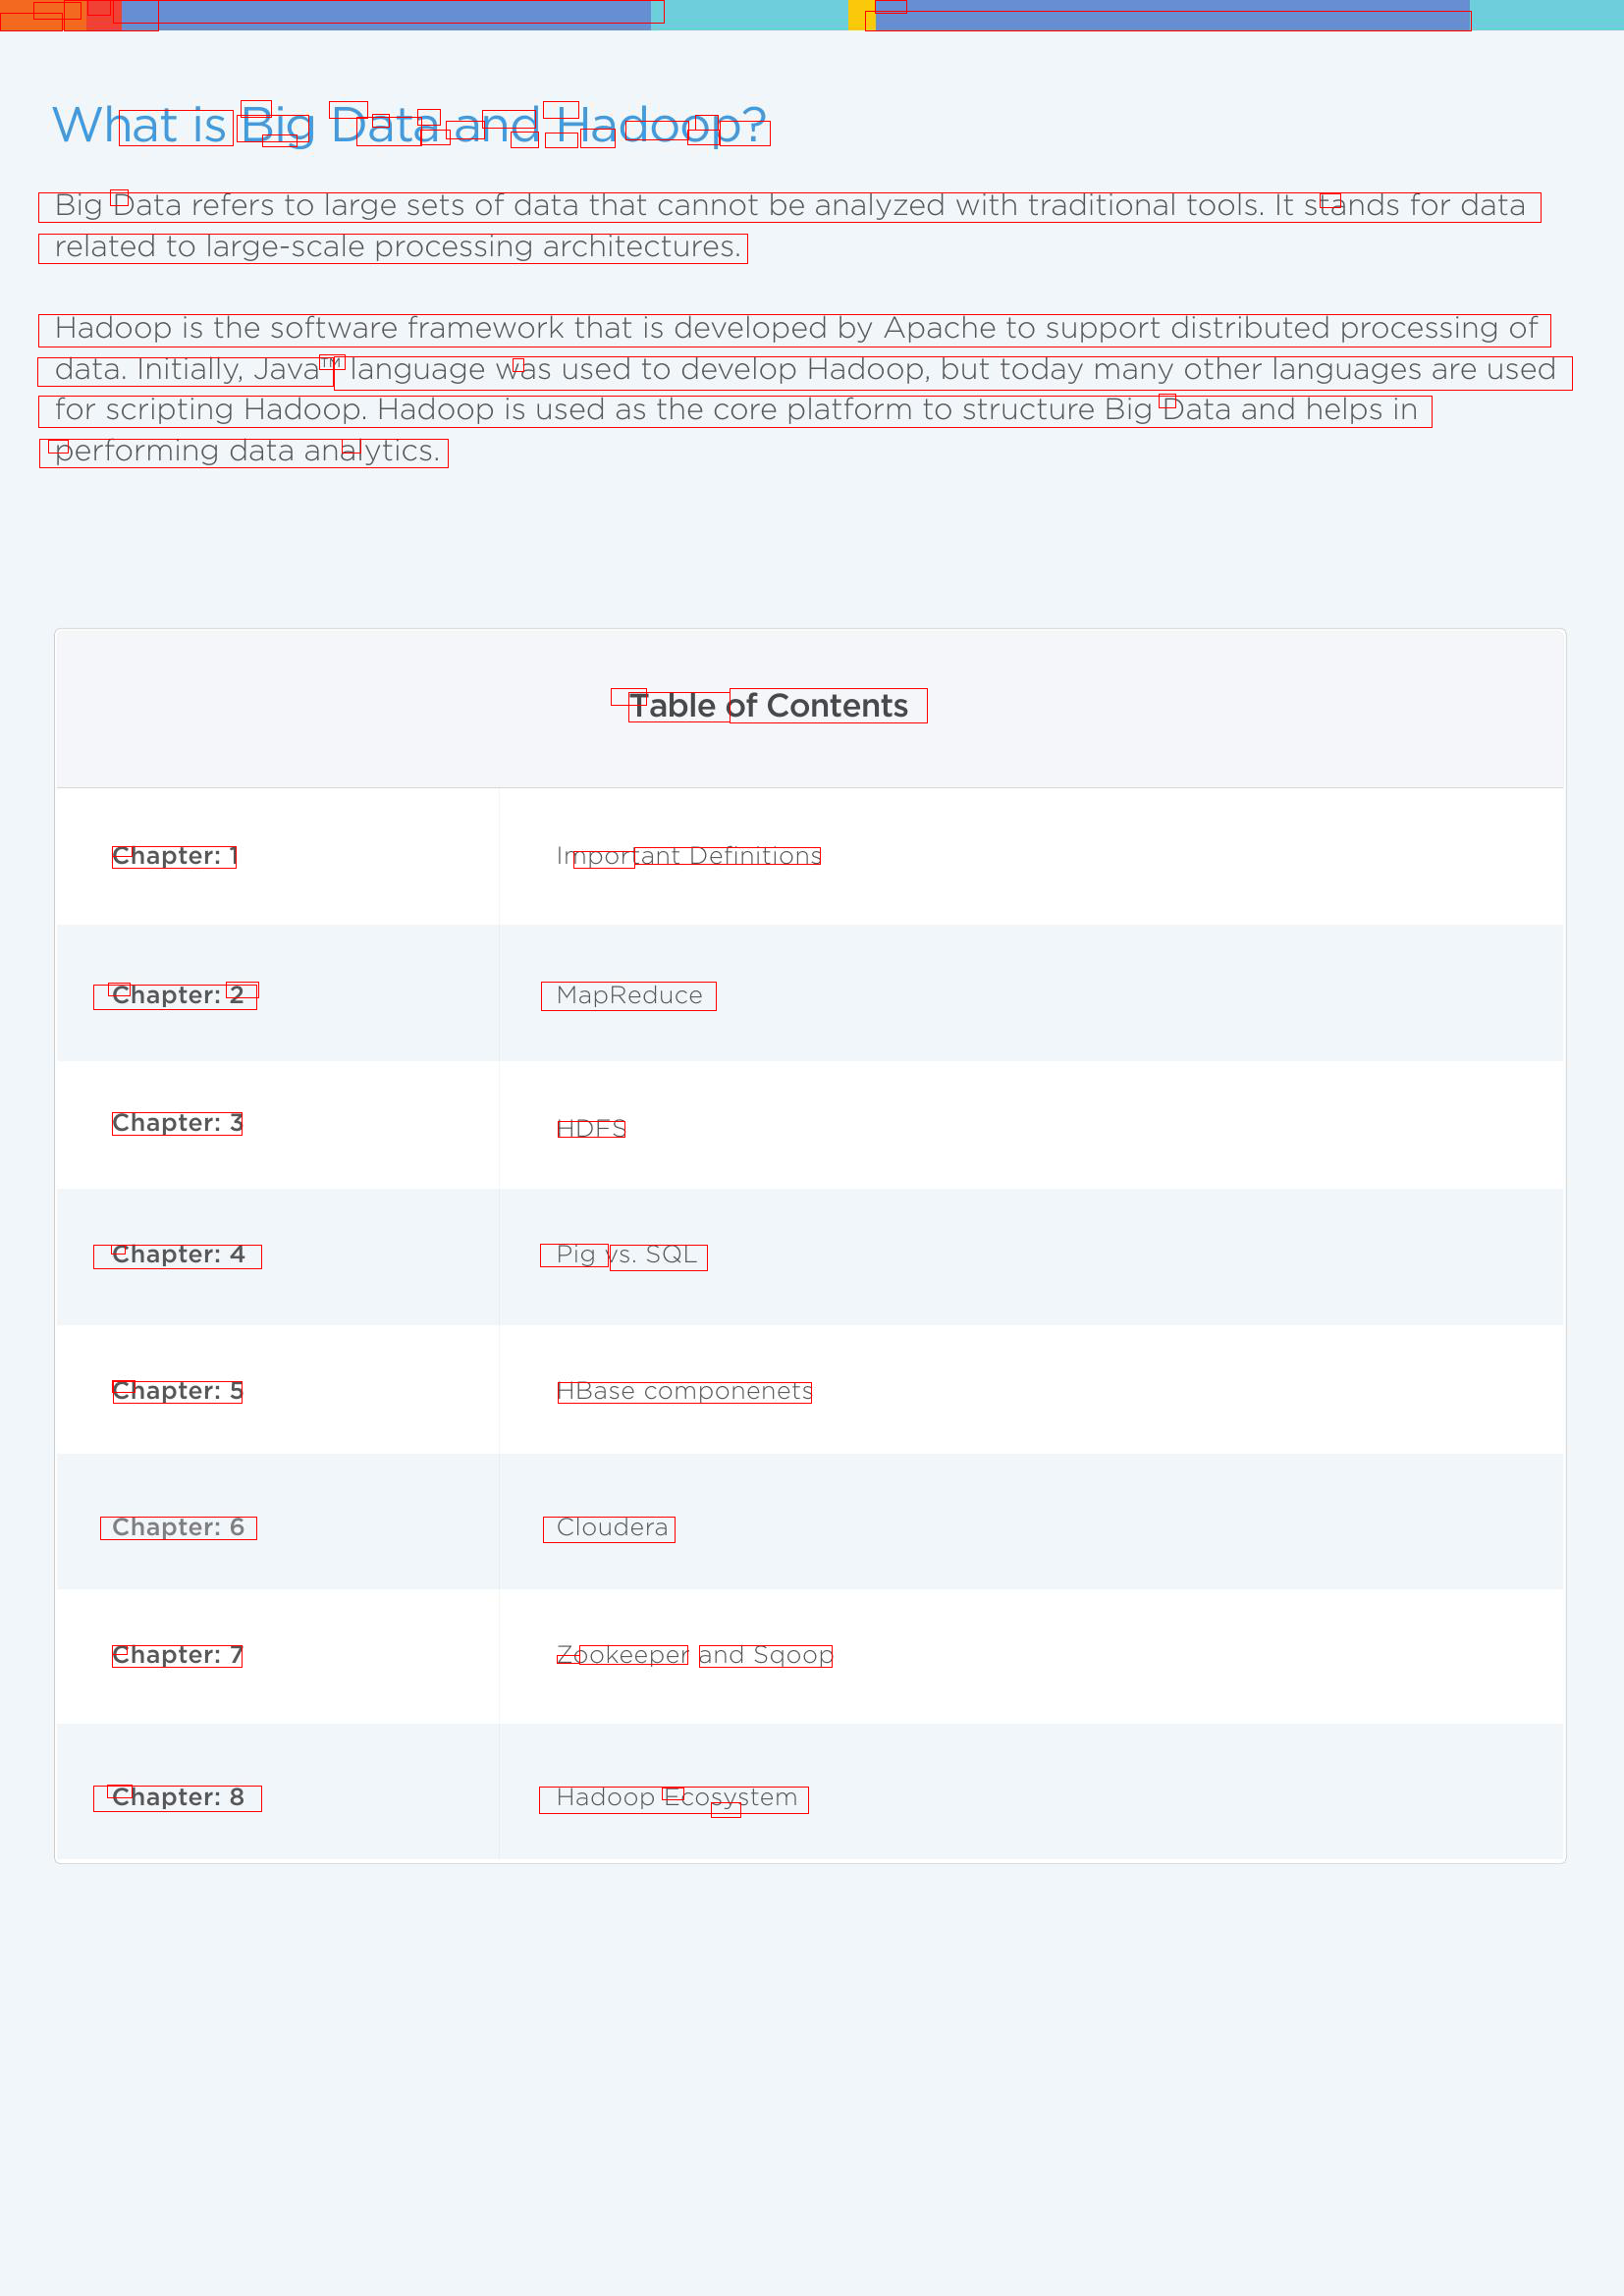

In [5]:
def show_boxes(img):
    # param img is a PIL.Image Object
    # return is and image 
    
    from PIL import ImageDraw
    # to draw bounding boxes
    drawing_object = ImageDraw.Draw(img)
    # drawing bounding boxes using pageseg
    bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
    
    for box in bounding_boxes:
        drawing_object.rectangle(box, fill = None, outline='red')
        
    return img

img = Image.open('Sample.png')
display(show_boxes(img))
img = Image.open('page1.jpg')
display(show_boxes(img))

In [6]:
def calculate_line_height(img):
    # param PIL.Image Object
    # return average height in px
    
    bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
    # boxes have values in tuples in the format (top, left, bottom, right)
    # hieght can be measured as top - bottom
    
    height_acc = 0
    for box in bounding_boxes:
        height_acc = height_acc + (box[3] - box[1])
        
    return int(height_acc/len(bounding_boxes))

img = Image.open('page1.jpg')
line_height = calculate_line_height(img)
print(line_height)

20
